In [9]:
import matplotlib.pyplot as plt
from pyimzml.ImzMLParser import ImzMLParser, browse, getionimage

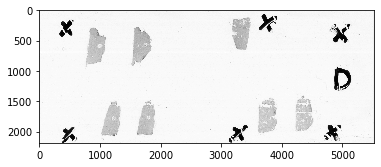

In [2]:
imgplot = plt.imshow(img)

In [145]:
import cv2
import numpy as np

img = cv2.imread('/usr/local/hdd/rita/msimaging/181114_AT1_SlideD_Proteins.tif')

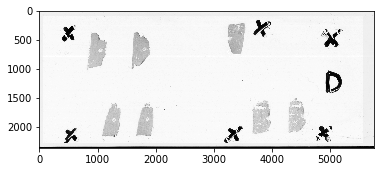

In [146]:
imgplot = plt.imshow(img)

In [44]:
print(img.shape)

(2187, 5526, 3)


In [45]:
parser = ImzMLParser("/usr/local/hdd/rita/msimaging/181114_AT1_Slide_D_Proteins.imzML")

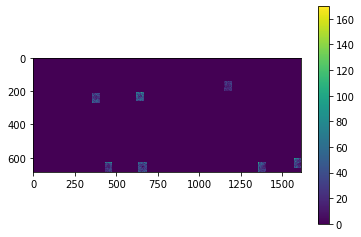

In [46]:
def tupel2map(spec):
    return dict(zip(spec[0], spec[1]))
map_1 = tupel2map(parser.getspectrum(1))
plt.imshow(getionimage(parser, max(map_1, key=map_1.get)))
plt.colorbar()

In [47]:
ionimg = getionimage(parser, max(map_1, key=map_1.get))

In [48]:
(getionimage(parser, max(map_1, key=map_1.get))).shape

(688, 1612)

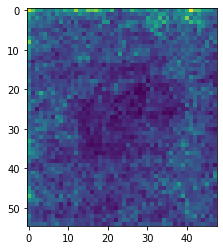

In [132]:
my_ionimage = ionimg[210:265,617:665]
plt.imshow(my_ionimage)

In [139]:
x_coef = (img.shape[0]-525)/ionimg.shape[0]
y_coef = (img.shape[1]-1100)/ionimg.shape[1]

In [140]:
y_coef

2.7456575682382134

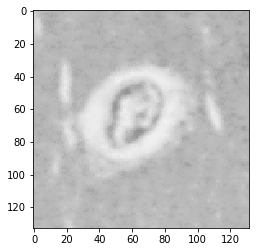

In [141]:
my_msimage = img[int(round(210*x_coef)):int(round(265*x_coef)),int(round(617*y_coef)):int(round(665*y_coef))]
plt.imshow(my_msimage)

In [142]:
print(210*x_coef, 265*x_coef,617*y_coef,665*y_coef)

507.29651162790697 640.1598837209302 1694.0707196029778 1825.8622828784119


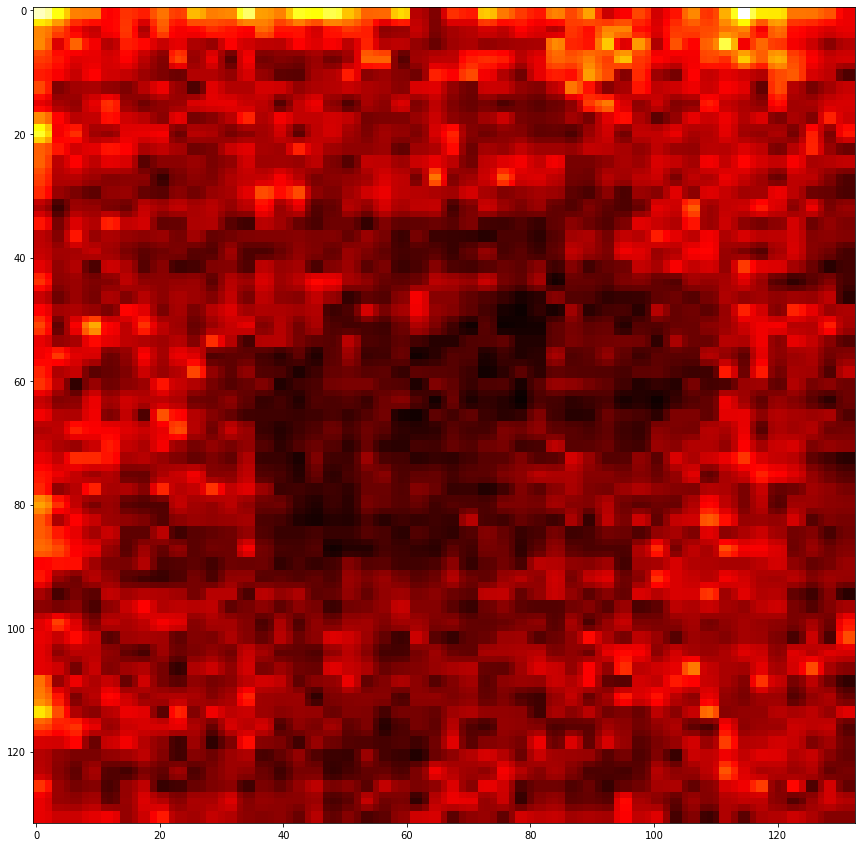

In [143]:
dim = (int(round(x_coef*my_ionimage.shape[0])), int(round(y_coef*my_ionimage.shape[1])))
# resize image
resized = cv2.resize(my_ionimage, dim, interpolation = cv2.INTER_AREA) 
plt.figure(figsize=(15,15))
plt.imshow(resized, cmap='hot')

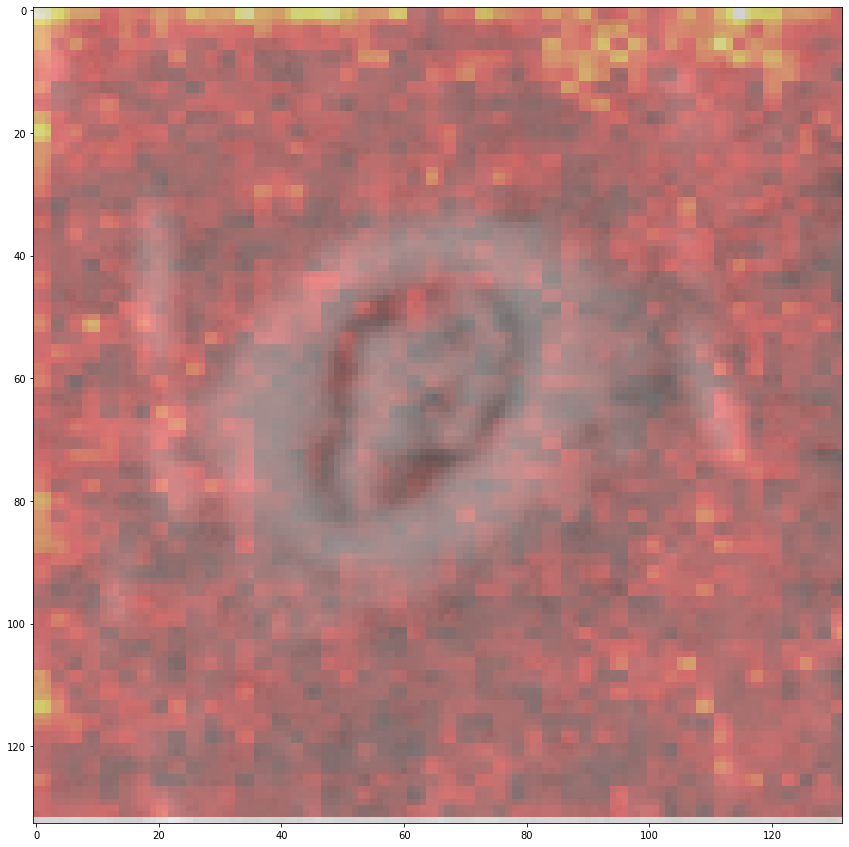

In [144]:
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(resized, cmap='hot')
ax.imshow(my_msimage, alpha=0.6)